## Introduction

The United Nations (UN) has declared eight Millennium Development Goals (MDG) namely to eradicate extreme poverty and hunger, achieve universal primary education, promote gender equality and empower women, reduce child mortality, improve maternal health, combat HIV/AIDS, malaria, and other diseases, ensure environmental sustainability, and build a global partnership for development. A primary focus of this report will be to determine if one of the UN's goals to ensure environmental sustainability is being achieved, by examining carbon dioxide (CO2) emissions, protected land and sea areas, and forests. Various Python modules will be used to process and visualize the data.

## Statistical Thinking 

#### Importing packages and opening the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import plotly.express as px

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

<strong>Opening the dataset we will be working with.</strong>

In [2]:
data_frame = pd.read_csv("../data/data.csv", na_values=[" ", ""])
data_frame.head(3)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.10,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.90,NaN,G,2493.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data cleaning

If there any duplicates of countries, they are dropped. This is so that we have an accurate reading of countries represented in the dataset.

In [3]:
data_frame.drop_duplicates("Country").info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 0 to 687
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   230 non-null    int64  
 1   Country       230 non-null    object 
 2   SeriesCode    230 non-null    int64  
 3   MDG           230 non-null    object 
 4   Series        230 non-null    object 
 5   1990          223 non-null    float64
 6   Footnotes     5 non-null      float64
 7   Type          224 non-null    object 
 8   1991          0 non-null      float64
 9   Footnotes.1   0 non-null      float64
 10  Type.1        0 non-null      object 
 11  1992          0 non-null      float64
 12  Footnotes.2   0 non-null      float64
 13  Type.2        0 non-null      object 
 14  1993          0 non-null      float64
 15  Footnotes.3   0 non-null      float64
 16  Type.3        0 non-null      object 
 17  1994          0 non-null      float64
 18  Footnotes.4   0 non-null      float

By inspection, there are 230 countries represented in the dataset. 

"Footnotes" and "Type" are renamed to give these columns two general names. These changes are made because there are different types of Footnotes and Types, so they are renamed to make the process of dropping them easier. We drop them because they are irrelevant and unused in this project.

In [4]:
data_frame.columns = data_frame.columns.str.replace(
    "^Footnotes.+", "Footnotes", regex=True
)
data_frame.columns = data_frame.columns.str.replace("^Type.+", "Type", regex=True)

In [5]:
data_frame = data_frame.drop("Footnotes", axis="columns")

In [6]:
data_frame = data_frame.drop("Type", axis="columns")

<strong>A function to find missing values by Country and Series</strong>

In [7]:
def find_nan_values_for_group(dataframe, columns):
    for groups in columns:
        print(
            f"{groups}: {dataframe.get_group(groups).isna().sum().sum()} missing values"
        )

<strong>Finding missing values by Country</strong>

In [8]:
df_by_country = data_frame.groupby(["Country"])

find_nan_values_for_group(df_by_country, data_frame["Country"].unique())

Afghanistan: 61 missing values
Albania: 61 missing values
Algeria: 61 missing values
American Samoa: 83 missing values
Andorra: 66 missing values
Angola: 61 missing values
Anguilla: 68 missing values
Antigua and Barbuda: 61 missing values
Argentina: 61 missing values
Armenia: 63 missing values
Aruba: 61 missing values
Australia: 61 missing values
Austria: 61 missing values
Azerbaijan: 63 missing values
Bahamas: 61 missing values
Bahrain: 61 missing values
Bangladesh: 61 missing values
Barbados: 61 missing values
Belarus: 63 missing values
Belgium: 61 missing values
Belize: 61 missing values
Benin: 61 missing values
Bermuda: 61 missing values
Bhutan: 61 missing values
Bolivia: 61 missing values
Bosnia and Herzegovina: 63 missing values
Botswana: 61 missing values
Brazil: 61 missing values
British Virgin Islands: 61 missing values
Brunei Darussalam: 61 missing values
Bulgaria: 61 missing values
Burkina Faso: 61 missing values
Burundi: 61 missing values
Cambodia: 61 missing values
Cameroo

C:\Users\frangeline\AppData\Local\Temp\ipykernel_29984\425831225.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f"{groups}: {dataframe.get_group(groups).isna().sum().sum()} missing values"
C:\Users\frangeline\AppData\Local\Temp\ipykernel_29984\425831225.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  f"{groups}: {dataframe.get_group(groups).isna().sum().sum()} missing values"


<strong>Finding missing values by Series</strong>

In [9]:
df_by_series = data_frame.groupby("Series")

find_nan_values_for_group(df_by_series, data_frame["Series"].unique())

Proportion of land area covered by forest, percentage: 6008 missing values
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC): 2325 missing values
Terrestrial and marine areas protected to total territorial area, percentage: 6231 missing values


<strong>Finding missing values by Years</strong>

In [10]:
for year in data_frame.columns[5:]:
    print(f"{year}: {data_frame[year].isnull().sum()} missing values")

1990: 63 missing values
1991: 508 missing values
1992: 486 missing values
1993: 486 missing values
1994: 485 missing values
1995: 483 missing values
1996: 484 missing values
1997: 481 missing values
1998: 481 missing values
1999: 481 missing values
2000: 34 missing values
2001: 479 missing values
2002: 478 missing values
2003: 478 missing values
2004: 478 missing values
2005: 254 missing values
2006: 476 missing values
2007: 475 missing values
2008: 475 missing values
2009: 475 missing values
2010: 252 missing values
2011: 475 missing values
2012: 690 missing values
2013: 690 missing values
2014: 467 missing values
2015: 690 missing values
2016: 690 missing values
2017: 690 missing values
2018: 690 missing values
2019: 690 missing values


Looking at the missing values by years, it shows that some of the years do not have any data collected and will therefore be dropped.

In [11]:
data_frame = data_frame.dropna(axis=1, how="all")

<strong>The data frame is made up of three types of series, therefore there will be three sections focusing on these subsets.</strong>

#### Findings of Carbon emissions

A subset of carbon emissions is created.

In [12]:
carbon_emissions_df = data_frame.loc[
    data_frame["Series"]
    == "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)"
]
carbon_emissions_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.0,3971.4,2387.2,2343.2,1928.8,...,4294.1,4165.7,4253.7,3865.0,4477.4,4657.1,4488.4,4415.1,4668.1,NaN
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,81220.4,81935.4,82294.8,86500.9,...,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374.0,119276.5,121755.4,NaN
10,16,American Samoa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,535.4,564.7,575.7,546.4,539.0,539.0,517.0,517.0,491.4,NaN


<strong> Dropping countries that have missing values throughout all the years </strong> 

Thresh=6 means that a row must have at least 6 columns that do not have nan values to not be dropped. CountryCode, Country, Seriescode, MDG, and Series columns do not have any missing values, the sixth column will be one of the year columns. There has to be at least one data point to be able to successfully interpolate.

In [13]:
carbon_emissions_df = carbon_emissions_df.dropna(axis=0, thresh=6)

In [14]:
carbon_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 1 to 688
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  217 non-null    int64  
 1   Country      217 non-null    object 
 2   SeriesCode   217 non-null    int64  
 3   MDG          217 non-null    object 
 4   Series       217 non-null    object 
 5   1990         181 non-null    float64
 6   1991         182 non-null    float64
 7   1992         204 non-null    float64
 8   1993         204 non-null    float64
 9   1994         205 non-null    float64
 10  1995         207 non-null    float64
 11  1996         206 non-null    float64
 12  1997         209 non-null    float64
 13  1998         209 non-null    float64
 14  1999         209 non-null    float64
 15  2000         210 non-null    float64
 16  2001         211 non-null    float64
 17  2002         212 non-null    float64
 18  2003         212 non-null    float64
 19  2004         

The info() shows that in 2014 there were no recorded carbon emissions, so that column will be dropped.

In [15]:
carbon_emissions_df = carbon_emissions_df.dropna(axis=1, how="all")

<strong>Creating a subset of only numerical values to be able to do interpolation </strong>

In [16]:
carbon_emissions_subset = carbon_emissions_df.iloc[:, 5:]
carbon_emissions_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 1 to 688
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    181 non-null    float64
 1   1991    182 non-null    float64
 2   1992    204 non-null    float64
 3   1993    204 non-null    float64
 4   1994    205 non-null    float64
 5   1995    207 non-null    float64
 6   1996    206 non-null    float64
 7   1997    209 non-null    float64
 8   1998    209 non-null    float64
 9   1999    209 non-null    float64
 10  2000    210 non-null    float64
 11  2001    211 non-null    float64
 12  2002    212 non-null    float64
 13  2003    212 non-null    float64
 14  2004    212 non-null    float64
 15  2005    213 non-null    float64
 16  2006    214 non-null    float64
 17  2007    215 non-null    float64
 18  2008    215 non-null    float64
 19  2009    215 non-null    float64
 20  2010    215 non-null    float64
 21  2011    215 non-null    float64
dtypes: floa

In [17]:
carbon_emissions_subset

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,2676.9,2493.6,1426.5,1375.1,1320.1,1268.8,1199.1,1114.8,1056.1,832.4,...,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4
4,7488.0,3971.4,2387.2,2343.2,1928.8,2086.5,2016.9,1543.8,1752.8,2984.9,...,3751.3,4294.1,4165.7,4253.7,3865.0,4477.4,4657.1,4488.4,4415.1,4668.1
7,78924.8,81220.4,81935.4,82294.8,86500.9,95345.7,97131.5,88195.0,107080.1,92118.7,...,90853.6,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374.0,119276.5,121755.4
13,NaN,NaN,NaN,NaN,NaN,407.0,425.4,458.4,484.0,513.4,...,531.7,535.4,564.7,575.7,546.4,539.0,539.0,517.0,517.0,491.4
16,4429.7,4367.4,4418.7,5801.2,3890.7,11012.0,10491.3,7381.7,7308.3,9156.5,...,12665.8,9064.8,18793.4,19156.4,22266.0,25152.0,27172.5,29361.7,29743.0,29710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.7,25.7,25.7,29.3,29.3,29.3,22.0,29.3,29.3,25.7
679,-2999.6,10109.9,14382.0,9431.5,11367.7,11250.4,14935.7,15474.7,12200.1,13894.3,...,15764.4,17304.6,18881.4,20043.8,20795.6,21297.9,22097.3,23556.8,25716.7,22295.4
682,133288.1,94278.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,2445.9,2416.6,2456.9,2500.9,2420.2,2170.9,1870.2,2390.9,2313.9,1807.8,...,1969.2,2101.2,2126.9,2277.2,2225.9,1914.2,2159.9,2486.2,2673.2,3047.3


<strong>Fill nan values using an interpolation method</strong>

In [18]:
carbon_emissions_subset.interpolate(
    method="linear", limit_direction="both", axis=1, inplace=True
)
carbon_emissions_subset.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,2676.9,2493.6,1426.5,1375.1,1320.1,1268.8,1199.1,1114.8,1056.1,832.4,...,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4
4,7488.0,3971.4,2387.2,2343.2,1928.8,2086.5,2016.9,1543.8,1752.8,2984.9,...,3751.3,4294.1,4165.7,4253.7,3865.0,4477.4,4657.1,4488.4,4415.1,4668.1
7,78924.8,81220.4,81935.4,82294.8,86500.9,95345.7,97131.5,88195.0,107080.1,92118.7,...,90853.6,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374.0,119276.5,121755.4
13,407.0,407.0,407.0,407.0,407.0,407.0,425.4,458.4,484.0,513.4,...,531.7,535.4,564.7,575.7,546.4,539.0,539.0,517.0,517.0,491.4
16,4429.7,4367.4,4418.7,5801.2,3890.7,11012.0,10491.3,7381.7,7308.3,9156.5,...,12665.8,9064.8,18793.4,19156.4,22266.0,25152.0,27172.5,29361.7,29743.0,29710.0


Other methods would have been better suited to deal with the missing values, however, since we do not know much about our data - for example, the rate of change of emissions over time - interpolating with a known value is the best option for now.

<strong>Merge the carbon emissions subset with the carbon emissions data frame <strong>

In [19]:
df1 = carbon_emissions_df.iloc[:, :5]
carbon_emissions_df = df1.join(carbon_emissions_subset)
carbon_emissions_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.0,3971.4,2387.2,2343.2,1928.8,...,3751.3,4294.1,4165.7,4253.7,3865.0,4477.4,4657.1,4488.4,4415.1,4668.1
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,81220.4,81935.4,82294.8,86500.9,...,90853.6,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374.0,119276.5,121755.4
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",407.0,407.0,407.0,407.0,407.0,...,531.7,535.4,564.7,575.7,546.4,539.0,539.0,517.0,517.0,491.4
16,24,Angola,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",4429.7,4367.4,4418.7,5801.2,3890.7,...,12665.8,9064.8,18793.4,19156.4,22266.0,25152.0,27172.5,29361.7,29743.0,29710.0


<strong>Carbon emissions in 1990</strong>

<strong>The bottom five countries.</strong>

In [20]:
carbon_emissions_df.loc[:, ["Country", "1990"]].sort_values("1990").head()

,Country,1990
679,Yemen,-2999.6
445,Niue,3.7
505,Saint Helena,7.3
631,Turks and Caicos Islands,11.0
673,Wallis and Futuna Islands,14.7


Yemen has a negative number amount of carbon emissions. The amount of carbon emissions can't be negative, this means that it is a faulty entry. It's important to check if there are any other negative entries so that they are dealt with.

In [21]:
(carbon_emissions_df.iloc[:, 5:] < 0).any().sum()

1

It looks like Yemen is the only country with negative emissions. The negative entry will be replaced with the next valid observation. This will be done in two steps:
1. Replacing the negative number with a nan value.
2. Using the fillna() function to replace it with the next valid observation.

In [22]:
carbon_emissions_df.replace(-2999.6, np.nan, inplace=True)

In [23]:
carbon_emissions_df = carbon_emissions_df.fillna(method="bfill", axis=1)

C:\Users\frangeline\AppData\Local\Temp\ipykernel_29984\1832428485.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  carbon_emissions_df = carbon_emissions_df.fillna(method="bfill", axis=1)


<strong>The bottom five countries.</strong>

In [24]:
carbon_emissions_df.loc[:, ["Country", "1990"]].sort_values("1990").head()

,Country,1990
445,Niue,3.7
505,Saint Helena,7.3
631,Turks and Caicos Islands,11.0
673,Wallis and Futuna Islands,14.7
559,Somalia,18.3


<strong>The top five countries.</strong>

In [25]:
carbon_emissions_df.loc[:, ["Country", "1990"]].sort_values(
    "1990", ascending=False
).head()

,Country,1990
652,United States,4823557.1
124,China,2460744.0
499,Russian Federation,2081840.2
301,Japan,1094287.8
229,Germany,929973.2


<strong>Carbon emissions in 2011</strong>

<strong>The bottom five countries </strong>

In [26]:
carbon_emissions_df.loc[:, ["Country", "2011"]].sort_values("2011").head()

,Country,2011
445,Niue,11.0
505,Saint Helena,11.0
673,Wallis and Futuna Islands,25.7
418,Nauru,51.3
346,Liechtenstein,51.3


<strong>The top five countries </strong>

In [27]:
carbon_emissions_df.loc[:, ["Country", "2011"]].sort_values(
    "2011", ascending=False
).head()

,Country,2011
124,China,9019518.2
652,United States,5305569.6
277,India,2074344.9
499,Russian Federation,1808073.0
301,Japan,1187657.0


The smallest amount of carbon emissions in 1990 was 3.7 thousand metric tons, while the smallest amount of carbon emissions 
in 2011 is 11 thousand metric tons. The highest amount of carbon emissions in 1990 is 4,823,557.1 thousand metric tons, while in 2011 it more than doubled and was 9,019,518.2 thousand metric tons. Throughout the years, carbon emissions have 
increased.

In [28]:
carbon_emissions_df.describe().T

,count,unique,top,freq
CountryCode,217,217,4,1
Country,217,217,Afghanistan,1
SeriesCode,217,1,749,217
MDG,217,1,Y,217
Series,217,1,"Carbon dioxide emissions (CO2), thousand metri...",217
1990,217.0,207.0,77.0,3.0
1991,217.0,205.0,77.0,3.0
1992,217.0,206.0,69.7,3.0
1993,217.0,202.0,11.0,3.0
1994,217.0,202.0,11.0,3.0


<strong>The median and mean of carbon emissions in 1990 are: </strong>

In [29]:
print(carbon_emissions_df["1990"].median(), "thousand metric tons")

4136.4 thousand metric tons


In [30]:
print(carbon_emissions_df["1990"].mean(), "thousand metric tons")

97444.64331797224 thousand metric tons


The mean is the average of the data set, and the median is the middle value of a sorted set of numbers, and both these parameters measure the central tendency (where the 'middle' of a data set is). The difference between the median and mean can be attributed to outliers. Outliers affect only the mean, and not the median - outliers are observations that differ significantly from other observations. This difference is also an indication of a skewed distribution. A skewed distribution is a distribution where the data is not symmetrical- most values fall on one tail of the distribution. Having a higher mean than median indicates that the distribution is skewed to the right.

<strong>The minimum and maximum value of CO2 emissions in 1990 are: </strong>

In [31]:
print("min:", carbon_emissions_df["1990"].min(), "thousand metric tons")

min: 3.7 thousand metric tons


In [32]:
print("max:", carbon_emissions_df["1990"].max(), "thousand metric tons")

max: 4823557.1 thousand metric tons


<strong>Calculating the Interquartile range by first calculating the 75th and 25th percentiles.</strong>

In [33]:
q3, q1 = np.nanquantile(carbon_emissions_df["1990"], [0.75, 0.25])
iqr = q3 - q1
print("Q1:", q1, "thousand metric tons")
print("Q3:", q3, "thousand metric tons")
print("IQR:", iqr, "thousand metric tons")

Q1: 542.7 thousand metric tons
Q3: 44183.7 thousand metric tons
IQR: 43641.0 thousand metric tons


The middle 50% of the emissions are between 542.7 and 44183.7 thousand metric tons. The lowest amount of emission being 3.7 and the highest 4823557.1 thousand metric tons.

<strong>A histogram of Carbon emissions distribution in 1990</strong>

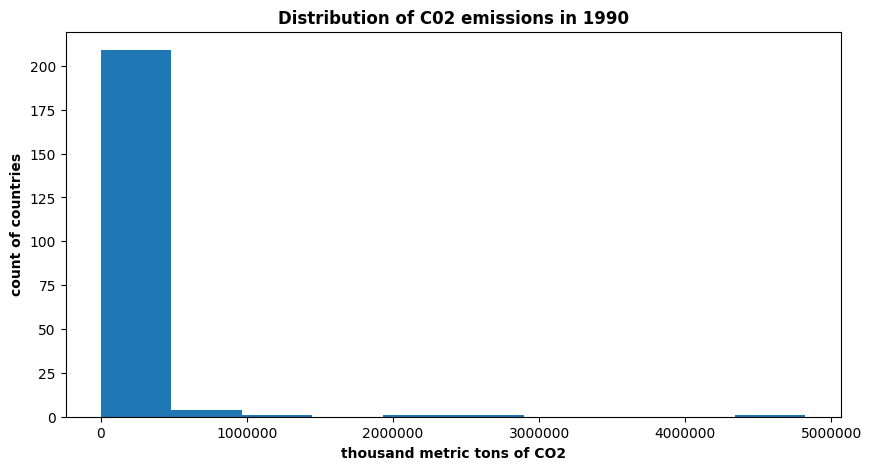

In [34]:
plt.hist(carbon_emissions_df["1990"])
plt.title("Distribution of C02 emissions in 1990")
plt.xlabel("thousand metric tons of CO2")
plt.ylabel("count of countries")
plt.ticklabel_format(style="plain")
plt.show()

This graph does not have a clear center, and has a tail to the right, therefore right skewed. Based on the above calculations, the skewness is expected.

<strong>The standard deviation and standard error of the mean for 1990 CO2 emissions are shown below.</strong>

In [35]:
print(carbon_emissions_df["1990"].std(), "thousand metric tons")

410707.6816203009 thousand metric tons


In [36]:
print(carbon_emissions_df["1990"].sem(), "thousand metric tons")

27880.654124082877 thousand metric tons


The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean, while the standard error estimates how accurate the mean of any given sample from that population is likely to be compared to the true population mean

Because of the large standard deviation, this means that the amounts of carbon emitted by these countries were not consistent. Some countries emitted really high amounts of carbon, while other countries emitted little to none.

Our data is not a sample, but a population because it investigates all the countries in the world so in this case the standard error cannot tell us much about our data. 

<strong>Creating a subset of the BRICS countries and the United States.</strong>

In [37]:
brics_usa_countries = carbon_emissions_df.loc[
    carbon_emissions_df["Country"].isin(
        [
            "Brazil",
            "Russian Federation",
            "China",
            "India",
            "United States",
            "South Africa",
        ]
    )
]
brics_usa_countries.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
82,76,Brazil,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",208887.0,219330.6,220705.7,230738.6,242154.0,...,332266.9,321621.6,337826.0,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9
124,156,China,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2460744.0,2584538.3,2695982.1,2878694.0,3058241.3,...,3694242.1,4525177.0,5288166.0,5790017.0,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2
277,356,India,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",690576.8,737851.7,783634.2,814297.7,864931.6,...,1226791.2,1281913.5,1348524.6,1411127.6,1504364.7,1611199.1,1793075.0,1965820.0,1950950.3,2074344.9
499,643,Russian Federation,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2081840.2,2081840.2,2081840.2,1941203.5,1701132.3,...,1557660.9,1604968.9,1602955.7,1615687.5,1669618.1,1667597.6,1715639.0,1574367.8,1742540.1,1808073.0
562,710,South Africa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",319795.4,332618.9,307822.6,321104.5,337576.7,...,347686.6,380810.6,424774.3,391819.0,422445.7,440989.8,469090.0,477806.4,454950.0,477241.7


In [38]:
irrelevant_columns = ["MDG", "Series", "SeriesCode"]
brics_usa_countries = brics_usa_countries.drop(columns=irrelevant_columns)
brics_usa_countries.head()

,CountryCode,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
82,76,Brazil,208887.0,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,...,332266.9,321621.6,337826.0,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9
124,156,China,2460744.0,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,...,3694242.1,4525177.0,5288166.0,5790017.0,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2
277,356,India,690576.8,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,...,1226791.2,1281913.5,1348524.6,1411127.6,1504364.7,1611199.1,1793075.0,1965820.0,1950950.3,2074344.9
499,643,Russian Federation,2081840.2,2081840.2,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,...,1557660.9,1604968.9,1602955.7,1615687.5,1669618.1,1667597.6,1715639.0,1574367.8,1742540.1,1808073.0
562,710,South Africa,319795.4,332618.9,307822.6,321104.5,337576.7,353458.5,358639.9,371327.8,...,347686.6,380810.6,424774.3,391819.0,422445.7,440989.8,469090.0,477806.4,454950.0,477241.7


<strong>Formatting the data frame to create a table that will make visualization easier. </strong>

In [39]:
brics_usa_countries.set_index(["CountryCode", "Country"], inplace=True)

In [40]:
brics_usa_countries = brics_usa_countries.stack().reset_index()
brics_usa_countries.columns = [
    "CountryCode",
    "Country",
    "Year",
    "CO2_emissions (metric tons)",
]

In [41]:
brics_usa_countries

,CountryCode,Country,Year,CO2_emissions (metric tons)
0,76,Brazil,1990,208887.0
1,76,Brazil,1991,219330.6
2,76,Brazil,1992,220705.7
3,76,Brazil,1993,230738.6
4,76,Brazil,1994,242154.0
...,...,...,...,...
127,840,United States,2007,5794923.4
128,840,United States,2008,5622464.4
129,840,United States,2009,5274132.4
130,840,United States,2010,5408869.0


<strong>Line graph of the BRICS coutries, with the United States, and their metric tons of carbon emissions.</strong>

In [ ]:
fig = px.line(
    brics_usa_countries,
    x="Year",
    y="CO2_emissions (metric tons)",
    color="Country",
    title="<b>Carbon Emissions of different countries from 1990 to 2011</b>",
)
fig.update_layout(font_family="Arial Black")
fig.show()

The <i>Carbon Emissions of different countries from 1990 to 2011</i> graph consists of the BRICS countries and the United States, showing the patterns of the carbon emissions from 1990 to 2011.

The amount of CO2 emissions from China at 1990 was approximately 2.4 million thousand metric tons, then gradually increased until 2002. From 2002, there was a rapid increase in CO2 emissions, almost linear. The peak of this increase occurred in 2011, when it reached over 9 million thousand metric tons. This is the highest amount of emissions by any country.

In 1990 and 1991, the Russian Federation had CO2 emissions of about 3000 thousand metric tons. Between 1991 and 1992, there was a spike in growth, reaching approximately 2 million thousand metric tons of CO2 emissions. This was the country's highest amount through out the years. After 1992, there was a gradual decrease, and by 2011 they had reached about 1.8 million thousand metric tons of CO2 emissions.

In 1990 and 1991, the Russian Federation had CO2 emissions of about 3,000 thousand metric tons. Between 1991 and 1992, there was a spike in growth, reaching approximately 2 million thousand metric tons of CO2 emissions. This was the country's highest amount through out the years. After 1992, there was a gradual decrease, and by 2011 they had reached about 1.8 million thousand metric tons of CO2 emissions.
India started off with approximately 690,000 thousand metric tons of CO2 emissions in 1990. This was followed by a gradual increase throughout the years, until it reached the peak of approximately 2 million thousand metric tons of CO2 emissions in 2011.

South Africa and Brazil had a similar CO2 emissions pattern. These two countries maintained an almost constant pattern, with an increase of approximately 100,000 thousand metric tons each by 2011. In 1990, they started off at approximately 319,000 and 208,000 thousand metric tons, respectively, and by 2011 both countries had CO2 emissions in the 400,000 range.

In 1990, the US generated the highest amount of CO2 emissions of the selected countries, at approximately 4.8 million thousand metric tons of CO2 emissions. The growth of CO2 emissions in this country was gradual, reaching a peak in 2005, at approximately 5.8 million thousand metric tons. From 2005, there was a gradual decline, but still above 5 million. Throughout the years, the US CO2 emissions remained below 6 million thousand metric tons.

#### Findings from forest-covered land and protected land

<strong> Land covered by forest </strong>

In [43]:
forest_covered_land_df = data_frame.loc[
    data_frame["Series"] == "Proportion of land area covered by forest, percentage"
]
forest_covered_land_df.head(3)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,NaN,NaN,NaN,...,NaN,NaN,2.1,NaN,NaN,NaN,NaN,2.1,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,NaN,NaN,NaN,...,NaN,NaN,28.5,NaN,NaN,NaN,NaN,28.3,NaN,NaN
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,NaN,NaN,NaN,NaN,...,NaN,NaN,0.6,NaN,NaN,NaN,NaN,0.6,NaN,NaN


<strong> Terrestrial and marine areas protected to total territorial area </strong>

In [44]:
protected_area_df = data_frame.loc[
    data_frame["Series"]
    == "Terrestrial and marine areas protected to total territorial area, percentage"
]
protected_area_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.91
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.46
11,16,American Samoa,616,Y,Terrestrial and marine areas protected to tota...,0.06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.62
14,20,Andorra,616,Y,Terrestrial and marine areas protected to tota...,5.53,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.50


<strong>Checking the state of the subsets</strong>

In [45]:
forest_covered_land_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 0 to 687
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  230 non-null    int64  
 1   Country      230 non-null    object 
 2   SeriesCode   230 non-null    int64  
 3   MDG          230 non-null    object 
 4   Series       230 non-null    object 
 5   1990         223 non-null    float64
 6   1991         0 non-null      float64
 7   1992         0 non-null      float64
 8   1993         0 non-null      float64
 9   1994         0 non-null      float64
 10  1995         0 non-null      float64
 11  1996         0 non-null      float64
 12  1997         0 non-null      float64
 13  1998         0 non-null      float64
 14  1999         0 non-null      float64
 15  2000         223 non-null    float64
 16  2001         0 non-null      float64
 17  2002         0 non-null      float64
 18  2003         0 non-null      float64
 19  2004         

In [46]:
protected_area_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 2 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  230 non-null    int64  
 1   Country      230 non-null    object 
 2   SeriesCode   230 non-null    int64  
 3   MDG          230 non-null    object 
 4   Series       230 non-null    object 
 5   1990         223 non-null    float64
 6   1991         0 non-null      float64
 7   1992         0 non-null      float64
 8   1993         0 non-null      float64
 9   1994         0 non-null      float64
 10  1995         0 non-null      float64
 11  1996         0 non-null      float64
 12  1997         0 non-null      float64
 13  1998         0 non-null      float64
 14  1999         0 non-null      float64
 15  2000         223 non-null    float64
 16  2001         0 non-null      float64
 17  2002         0 non-null      float64
 18  2003         0 non-null      float64
 19  2004         

<strong>Dropping missing values</strong>

The info() shows that data for both subsets were not recorded yearly, so the periods without data will be dropped.

Thresh=6 means that a row must have at least 6 columns that do not have nan values to not be dropped.  CountryCode, Country, Seriescode, MDG, and Series columns do not have any missing values, the sixth column will be one of the year columns. There has to be at least one data point to be able to successfully make calculations.

In [47]:
forest_covered_land_df = forest_covered_land_df.dropna(axis=1, how="all")
forest_covered_land_df = forest_covered_land_df.dropna(axis=0, thresh=6)

In [48]:
protected_area_df = protected_area_df.dropna(axis=1, how="all")
protected_area_df = protected_area_df.dropna(axis=0, thresh=6)

<strong>Checking nan values </strong>

In [49]:
forest_covered_land_df.isna().sum().sum()

0

In [50]:
protected_area_df.isna().sum().sum()

0

There are no missing values in both the forestry and protected area data sets. 

<strong>Checking the descriptive statistics </strong>

In [51]:
protected_area_df.describe()

,CountryCode,SeriesCode,1990,2000,2014
count,223.000000,223.0,223.000000,223.000000,223.000000
mean,430.816143,616.0,4.742332,6.704126,11.288251
std,251.233367,0.0,6.726211,8.355043,13.919459
min,4.000000,616.0,0.000000,0.000000,0.000000
25%,216.000000,616.0,0.230000,0.540000,1.530000
50%,430.000000,616.0,2.230000,3.550000,6.690000
75%,642.500000,616.0,6.830000,10.110000,17.695000
max,894.000000,616.0,41.130000,43.820000,99.720000


In [52]:
forest_covered_land_df.describe()

,CountryCode,SeriesCode,1990,2000,2005,2010
count,223.000000,223.0,223.000000,223.000000,223.000000,223.000000
mean,432.991031,567.0,32.977130,32.431390,32.147085,31.911211
std,253.250597,0.0,25.497512,24.873862,24.593779,24.406771
min,4.000000,567.0,0.000000,0.000000,0.000000,0.000000
25%,216.000000,567.0,11.050000,10.700000,10.700000,10.450000
50%,430.000000,567.0,30.200000,30.500000,31.000000,31.100000
75%,650.000000,567.0,50.550000,49.100000,49.100000,47.650000
max,894.000000,567.0,99.200000,98.800000,98.500000,98.300000


Nothing seems amiss with both data sets - the minimum and maximum values are within the correct bounds, 0-100, as they are percentages. There are 223 countries in both data sets.

<strong>The standard deviation and mean of land covered by forest in 1990: </strong>

From the basic descriptive statistics table, the standard deviation is 25.5 percent and the mean is 32.98 percent. The standard deviation is large because of the wide variation of the data. 

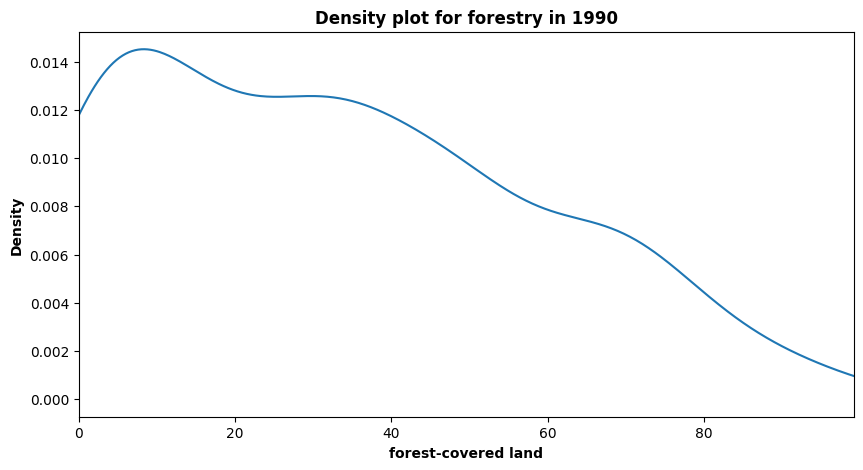

In [53]:
forest_covered_land_df["1990"].plot.density()
plt.xlim([0, max(forest_covered_land_df["1990"])])
plt.title("Density plot for forestry in 1990")
plt.xlabel('forest-covered land')
plt.show()

The density plot of forest-covered land shows a slightly right skewed distribution, and the wide variation of the distribution.

The x-axis starts from a negative number even though a forest-covered land cannot be negative because the used distribution will cover both sides of the average value equally.

<strong>A histogram of the land covered by forest in 1990 to determine the distribution of that year.</strong>

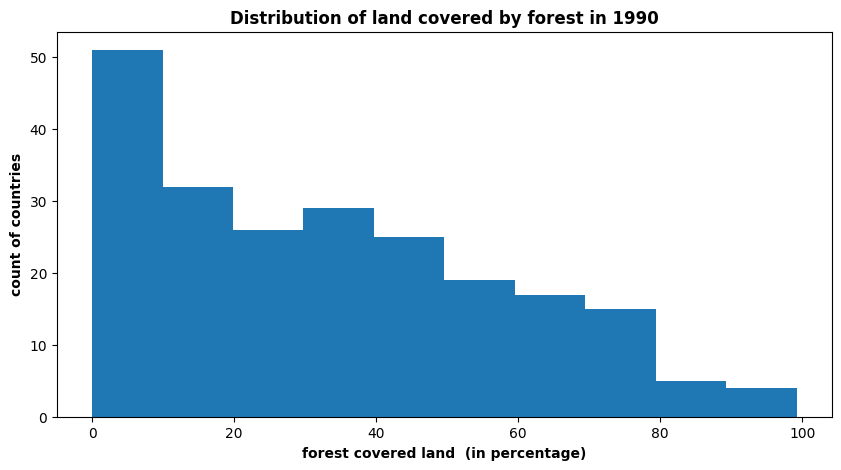

In [54]:
plt.hist(forest_covered_land_df["1990"])
plt.title("Distribution of land covered by forest in 1990")
plt.xlabel("forest covered land  (in percentage)")
plt.ylabel("count of countries")
plt.show()

The peak of the graph is towards the left and the tail to the right, hence the graph is right-tailed (right skewed)

<strong> Asserting if the two data sets are equal </strong>

In [55]:
assert len(protected_area_df) == len(forest_covered_land_df)

<strong>Check if both data sets have the same countries</strong>

In [56]:
pd.concat(
    [protected_area_df["Country"], forest_covered_land_df["Country"]]
).drop_duplicates(keep=False)

128    China, Hong Kong Special Administrative Region
131        China, Macao Special Administrative Region
395                                            Monaco
566                                       South Sudan
578                                             Sudan
234                                         Gibraltar
504                                      Saint Helena
513                         Saint Pierre and Miquelon
579                                    Sudan (former)
672                         Wallis and Futuna Islands
Name: Country, dtype: object

The presence of countries that are not in both data sets isn't ideal since there will be correlation calculations to determine their relationship, and for correlation to be accurate, the countries must be the same. These countries will therefore be dropped from their respective data sets.

In [57]:
countries_not_in_forestry = ["China, Hong Kong Special Administrative Region", "China, Macao Special Administrative Region", 
                                   "Monaco", "South Sudan", "Sudan"]
protected_area_df = protected_area_df.apply(lambda row: row[~protected_area_df['Country'].isin(countries_not_in_forestry)])

In [58]:
countries_not_in_protected = ["Gibraltar", "Saint Helena", "Saint Pierre and Miquelon", "Sudan (former)", "Wallis and Futuna Islands"]
forest_covered_land_df.drop(forest_covered_land_df[forest_covered_land_df['Country'].isin(countries_not_in_protected)].index, axis = 0, inplace = True)

<strong>Check if both data sets still have the same countries</strong>

In [59]:
pd.concat(
    [protected_area_df["Country"], forest_covered_land_df["Country"]]
).drop_duplicates(keep=False)

Series([], Name: Country, dtype: object)

The data sets now have the same countries

<strong> Asserting if the two data sets are still equal </strong>

In [60]:
assert len(protected_area_df) == len(forest_covered_land_df)

<strong> Investigating relationship between the forest-covered land and the protected areas </strong>

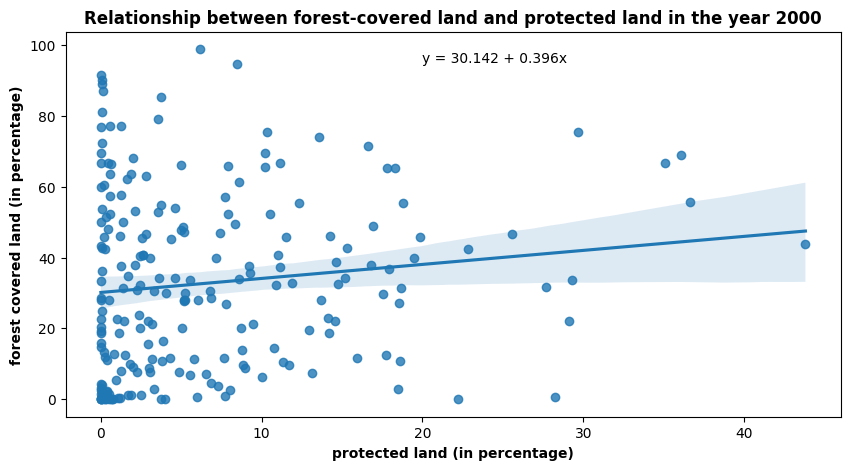

In [61]:
regression_plot = sns.regplot(
    x=protected_area_df["2000"], y=forest_covered_land_df["2000"], data=data_frame
)
plt.xlabel("protected land (in percentage)")
plt.ylabel("forest covered land (in percentage)")
plt.title(
    "Relationship between forest-covered land and protected land in the year 2000"
)

slope, intercept, r, p, sterr = sp.linregress(
    x=regression_plot.get_lines()[0].get_xdata(),
    y=regression_plot.get_lines()[0].get_ydata(),
)
plt.text(20, 95, f"y = {str(round(intercept, 3))} + {str(round(slope, 3))}x")
plt.show()

From the lack of a clear graph pattern, it seems that there is no relationship between forest-covered land and protected areas. According to the regression line, the slope is 0.396, indicating that although the pattern shows no relationship, there may be a weak correlation.
There are data points that have zero percentage of protected land, and increase in a vertical linear manner. There are unusual values - outliers. In this case, these are the data points that are separated from one another by a significant amount.


<strong>Finding the outliers using the protected area data set</strong>

In [62]:
q3, q1 = np.nanquantile(protected_area_df["2000"], [0.75, 0.25])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print("lower bound =", lower_bound)
print("upper bound =", upper_bound)

lower bound = -13.457499999999998
upper bound = 23.902499999999996


Because the protected area and forest-covered land are recorded in percentages, the outliers should be between zero and a hundred. The lower bound is out of question because it's negative. The countries that have percentages of over 23.9 will be classified as outliers. 

In [63]:
protected_area_df.loc[protected_area_df['2000'] > upper_bound, 'Country']

38               Austria
71                Bhutan
80              Botswana
89     Brunei Darussalam
230              Germany
347        Liechtenstein
353           Luxembourg
530         Saudi Arabia
668            Venezuela
686               Zambia
Name: Country, dtype: object

These countries have unusually higher percentages of protected areas compared to the other countries in the world. There isn't really a clear pattern of why that is - they are from different continents and differ in wealth.

<strong>Log transforming protected land and land covered by forest, focusing on the year 2000. This is done to skewed data to conform it to normality</strong>

The natural log returns error if the value is zero, this is why 0.00001 is added to every data point. It is small to not make a significant difference but greater than zero.

In [64]:
transformed_protected_area = np.log10(protected_area_df["2000"] + 0.00001)

In [65]:
transformed_forest_covered_land = np.log10(forest_covered_land_df["2000"] + 0.00001)

<strong>A histogram of the transformed protected_area_df</strong>

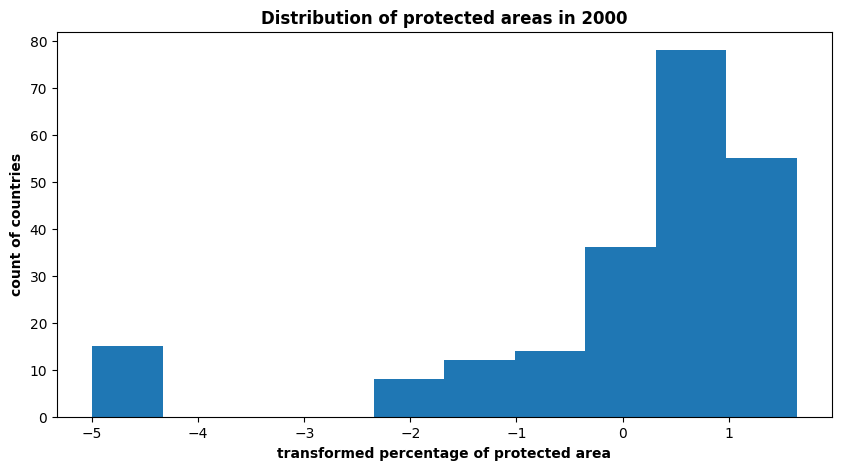

In [66]:
plt.hist(transformed_protected_area)
plt.title("Distribution of protected areas in 2000")
plt.ylabel("count of countries")
plt.xlabel("transformed percentage of protected area")
plt.show()

The distribution has a peak on the right side of the data, with the tail trailing to the left - this distribution is therefore skewed to the left.

<strong>A histogram of the transformed forest_covered_land_df</strong>

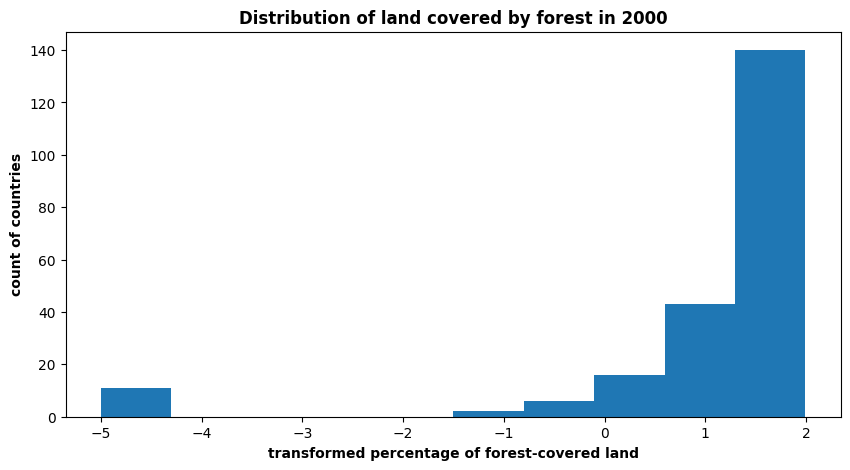

In [67]:
plt.hist(transformed_forest_covered_land)
plt.title("Distribution of land covered by forest in 2000")
plt.ylabel("count of countries")
plt.xlabel("transformed percentage of forest-covered land")
plt.show()

The distribution is skewed to the left

<strong>Log transforming protected_area_df and forest_covered_land_df, focusing on the year 1990 and finding the correlation between these two variables, with their p-value. </strong>

In [68]:
transformed_protected_land_1990 = np.log10(protected_area_df["1990"] + 0.00001)

In [69]:
transformed_forest_covered_land_1990 = np.log10(
    forest_covered_land_df["1990"] + 0.00001
)

<strong> Pearson Correlation Coefficient </strong>

The Pearson Correlation Coefficient is a test statistics that investigate the correlation of two relationships. A significance level (alpha) is chosen as a criterion to reject the hypothesis or not. The standard significance level is 0.05.

<strong>H<sub>0</sub></strong> : The two variables do not have a linear relationship. <br>
<strong>H<sub>1</sub></strong>: The two variables have a linear relationship

In [70]:
sp.pearsonr(transformed_protected_land_1990, transformed_forest_covered_land_1990)

PearsonRResult(statistic=0.24794542036893757, pvalue=0.00021753521425392435)

The correlation coefficient indicates that there is a weak relationship between the two variables, and the one variable increases with the other. The p-value is less than the alpha, we therefore reject the null hypothesis (H<sub>0</sub>).

<strong> Spearman Rank-Order Correlation Coefficient </strong>

The Spearman Rank Correlation is used to measure the correlation between two ranked variables. A significance level (alpha) is chosen as a criterion to reject the hypothesis or not. The standard significance level is 0.05.

<strong>H<sub>0</sub></strong> : The two variables do not have a monotonic relationship <br>
<strong>H<sub>1</sub></strong>: The two variables have a monotonic relationship

In [71]:
sp.spearmanr(transformed_protected_land_1990, transformed_forest_covered_land_1990)

SignificanceResult(statistic=0.09929087294679183, pvalue=0.14396137671319045)

The Spearman Rank-Order Correlation indicates that there is a weak relationship between the two variables, and the one variable increases with the other. The p-value is greater than the alpha, we therefore fail to reject the null hypothesis (H<sub>0</sub>).

<strong> Why the different results between the Spearman Rank Correlation Coefficient and the Pearson Correlation Coefficient? </strong><br>

* The two correlation tests investigates two different types of relationships - linear and monotonic (the hypotheses above test for each relationship). The two variables, protected land and forest-covered land do not have a linear relationship but they have a monotonic relationship, and that is why the correlation coefficients are different.

# Conclusion

This notebook sought to determine whether one of the UN's Millennium Development Goals, ensuring environmental sustainability, had been met. Starting with carbon dioxide emissions, evidence suggests that, despite an increase in carbon emissions from 1990 to 2011, this was due to countries such as China, which had doubled its emissions by 2011. Some countries, such as the United States, have made efforts to reduce their emissions, while others, such as Brazil and South Africa, have made efforts to maintain their low levels of emissions.
The amount of land covered by forests and protected lands have had little to no change. Some countries have had an increase and some a  decrease of about a percent. 